# <font color=orange>Prepare OSA data for extreme OSA cases classification</font>
* # Read: OSA_DB_UPM.xlsx </font>
* # Write: OSA_extreme_male.xlsx</font>




---
---
Load : OSA_DB_UPM.xlsx  from your Laptop



In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving OSA_DB_UPM.xlsx to OSA_DB_UPM.xlsx
User uploaded file "OSA_DB_UPM.xlsx" with length 26689 bytes


In [2]:
ls

OSA_DB_UPM.xlsx  sample_data/


---

### Read the *OSA_DB_UPM.xlsx* file

In [3]:
# Import pandas
import pandas as pd

# Read OSA_DB_UPM.xlsx
df_OSA = pd.read_excel("OSA_DB_UPM.xlsx")


In [ ]:
df_OSA.dtypes

Patient      object
Gender       object
IAH         float64
Weight        int64
Height        int64
Age           int64
Cervical    float64
dtype: object

In [21]:
df_OSA.head(5)

,Patient,Gender,IAH,Weight,Height,Age,Cervical
0,P0002,hombre,29.6,119,174,56,48.0
1,P0004,hombre,19.7,78,168,39,42.0
2,P0005,hombre,9.0,80,173,32,40.0
3,P0006,hombre,2.0,109,190,32,42.0
4,P0007,hombre,34.0,86,169,39,42.0


In [22]:
df_OSA['Gender'].value_counts()

hombre    455
mujer     182
Name: Gender, dtype: int64

### We will begin considering only the male subjets

* ##### Some Pandas basics: you can read using iloc() and loc()
##### https://www.geeksforgeeks.org difference-between-loc-and-iloc-in-pandas-dataframe/

In [52]:
df_OSA_male = df_OSA.loc[df_OSA['Gender'] == 'hombre']

In [53]:
df_OSA_male.describe()

,IAH,Weight,Height,Age,Cervical
count,455.000000,455.000000,455.000000,455.000000,455.000000
mean,22.526945,91.718681,175.391209,48.846154,42.173626
std,18.372127,17.194149,7.275625,12.550974,3.184241
min,0.000000,61.000000,152.000000,20.000000,34.000000
25%,8.700000,80.000000,170.000000,39.000000,40.000000
50%,17.200000,89.000000,175.000000,48.000000,42.000000
75%,33.000000,100.000000,180.000000,58.000000,44.000000
max,102.000000,162.000000,197.000000,85.000000,53.000000


## We add column to tag three clases:
* ####     Healthy (IAH <= 10)
* ####     Mild (10<IAH<30)
* ####     Severe (IAH >=30)

In [54]:
conditions = [
    (df_OSA_male['IAH'] <= 10),
    (df_OSA_male['IAH'] > 10) & (df_OSA_male['IAH'] < 30),
    (df_OSA_male['IAH'] >= 30)
    ]

In [55]:
# conditions are THREE lists of true or false values
len(conditions)

3

In [56]:
# create a list of the values we want to assign for each one of the THREE conditions
values = ['Healthy', 'Mild', 'Severe']

In [57]:
# create a new column and use np.select to assign values to it using our lists as arguments

# NOTE: we use select() from numpy
# numpy.select(condlist, choicelist, default=0)[source]
# Return an array drawn from elements in choicelist, depending on conditions

import numpy as np

df_OSA_male['OSA'] = np.select(conditions, values)

# see chatGPT reason to this warning
# It can be solved using the sentence below to create the df_OSA_male dataframe:
# df_OSA_male = df_OSA.loc[df_OSA['Gender'] == 'hombre'].copy()
#
# In this way df_OSA_male is a NEW dataframe; BUT if you read im the warning link there are reasons about faster execution

<ipython-input-57-863664d81932>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_OSA_male['OSA'] = np.select(conditions, values)


## Select only Severe and Healthy cases

In [68]:
df_OSA_male_extreme = df_OSA_male.loc[df_OSA_male['OSA'] != 'Mild']

In [69]:
df_OSA_male_extreme.head(10)

,Patient,Gender,IAH,Weight,Height,Age,Cervical,OSA
2,P0005,hombre,9.0,80,173,32,40.0,Healthy
3,P0006,hombre,2.0,109,190,32,42.0,Healthy
4,P0007,hombre,34.0,86,169,39,42.0,Severe
5,P0008,hombre,60.0,145,172,47,44.0,Severe
8,P0013,hombre,3.7,90,180,36,40.0,Healthy
15,P0020,hombre,4.3,89,171,44,45.0,Healthy
17,P0022,hombre,56.0,113,177,33,46.0,Severe
19,P0024,hombre,53.6,107,170,48,46.0,Severe
20,P0025,hombre,2.1,70,174,53,38.0,Healthy
22,P0027,hombre,47.0,100,180,62,48.0,Severe


## Now add BMI feature

In [67]:
df_OSA_male_extreme['BMI'] = \
        df_OSA_male_extreme['Weight'] / (df_OSA_male_extreme['Height']/100.0)**2

In [70]:
df_OSA_male_extreme.head(10)

,Patient,Gender,IAH,Weight,Height,Age,Cervical,OSA
2,P0005,hombre,9.0,80,173,32,40.0,Healthy
3,P0006,hombre,2.0,109,190,32,42.0,Healthy
4,P0007,hombre,34.0,86,169,39,42.0,Severe
5,P0008,hombre,60.0,145,172,47,44.0,Severe
8,P0013,hombre,3.7,90,180,36,40.0,Healthy
15,P0020,hombre,4.3,89,171,44,45.0,Healthy
17,P0022,hombre,56.0,113,177,33,46.0,Severe
19,P0024,hombre,53.6,107,170,48,46.0,Severe
20,P0025,hombre,2.1,70,174,53,38.0,Healthy
22,P0027,hombre,47.0,100,180,62,48.0,Severe


### Save df_OSA_male_extreme writing in *OSA_extreme_male.xlsx* file

In [71]:
df_OSA_male_extreme.to_excel('OSA_extreme_male.xlsx', sheet_name='Hoja1', index = False)

# Download the Excel to our local system

In [72]:

files.download('OSA_extreme_male.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# .... now is time to do some exploratory analysis
# ...now FOR CLASSIFICATION!!!

# You could read on the use of SQL vs Pandas functions

https://pandas.pydata.org/docs/getting_started/comparison/comparison_with_sql.html

In [73]:
df_OSA_male_extreme.groupby('OSA').describe()

IAH                                                      Weight  \
         count       mean        std   min   25%   50%   75%    max  count   
OSA                                                                          
Healthy  141.0   5.031915   3.096964   0.0   2.6   4.8   8.0   10.0  141.0   
Severe   137.0  45.469781  14.344751  30.0  34.3  41.5  53.0  102.0  137.0   

                    ...   Age       Cervical                                   \
              mean  ...   75%   max    count       mean       std   min   25%   
OSA                 ...                                                         
Healthy  86.000000  ...  53.0  75.0    141.0  40.836879  2.789327  35.0  39.0   
Severe   99.021898  ...  59.0  80.0    137.0  43.562044  3.382179  34.0  42.0   

                           
          50%   75%   max  
OSA                        
Healthy  41.0  43.0  50.0  
Severe   44.0  46.0  53.0  

[2 rows x 40 columns]

OSA
Healthy    Axes(0.125,0.11;0.775x0.77)
Severe     Axes(0.125,0.11;0.775x0.77)
Name: Cervical, dtype: object

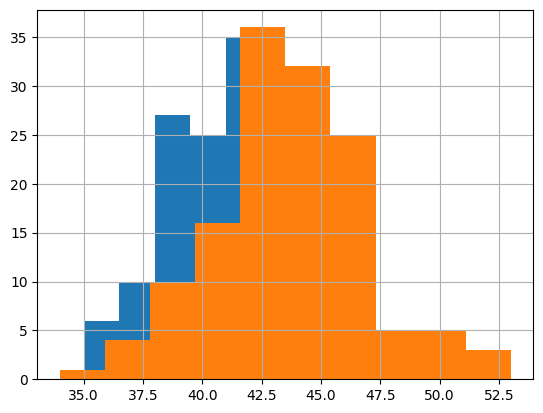

In [74]:
df_OSA_male_extreme.groupby('OSA')['Cervical'].hist()

In [75]:
from scipy import stats

group1 = df_OSA_male_extreme.where(df_OSA_male_extreme.OSA== 'Healthy').dropna()['Age']
group2 = df_OSA_male_extreme.where(df_OSA_male_extreme.OSA== 'Severe').dropna()['Age']


In [76]:
stats.ttest_ind(group1,group2)

TtestResult(statistic=-5.122076517455765, pvalue=5.681249768299164e-07, df=276.0)

In [77]:
stats.mannwhitneyu(group1,group2)

MannwhitneyuResult(statistic=6365.5, pvalue=8.879224982904181e-07)